<a href="https://colab.research.google.com/github/RITIK1442840127/Cardiovascular-Risk-Prediction-/blob/main/Capstone_Project_3_Cardiovascular_Risk_Prediction_Ritik_Tiwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.

**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# <b> <u>Variable Description</u></b>

**Demographic:**
*  **Sex**: male or female("M" or "F")

*  **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) -DV



---



**Importing Required Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

## **Reading the Data**

In [2]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("/content/data_cardiovascular_risk.csv")

In [3]:
# print first 5 rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# print last 5 rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [5]:
# number of rows and columns in the dataset
df.shape

(3390, 17)

In [6]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Data Preprocessing and Basic EDA**

We drop the education and id columns because it has no correlation with heart disease.

In [7]:
# Removing columns such as 'id' & 'education' 
df.drop(['id','education'],axis=1,inplace=True)

In [8]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


 Before we go ahead, an important step to do is to convert our string feature  into an integer.
 
  We will name 

*   In **sex** feature  **M** will be converted to 1 and **F** will be converted to 0.
*   In **is_smoking** feature  **YES** will be converted to 1 and **NO** will be converted to 0.


In [9]:
# Applying function to convert string data to an integer
df['sex'] = df['sex'].apply(lambda x : 1 if x == "M" else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [10]:
# checking the distribution
df['sex'].value_counts()

0    1923
1    1467
Name: sex, dtype: int64

In [11]:
# checking the distribution
df['is_smoking'].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int64  
 2   is_smoking       3390 non-null   int64  
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.4 KB


In [13]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**Missing Value Analysis** 

 Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [14]:
# checking for missing values
df.isnull().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

 The next single-line code will visualize the location of missing values.

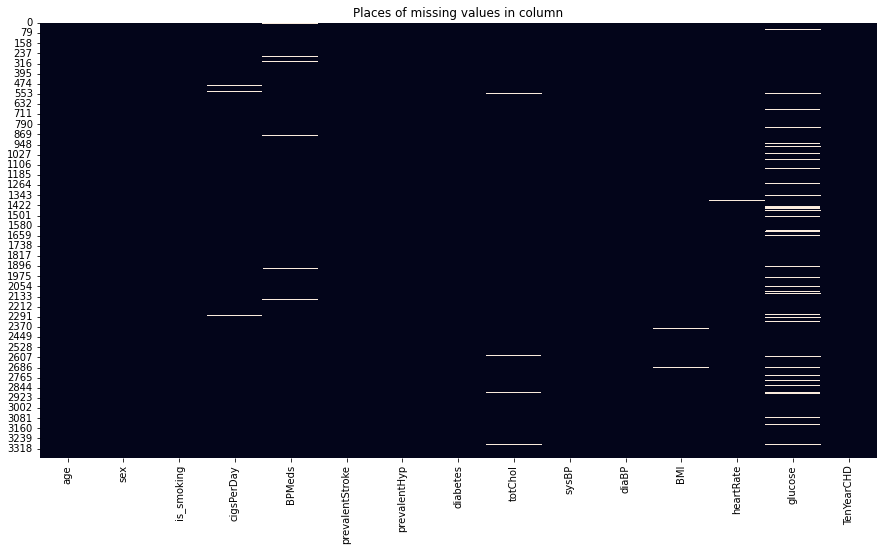

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Places of missing values in column')
sns.heatmap(df.isnull(), cbar=False, ax=ax)

In [16]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


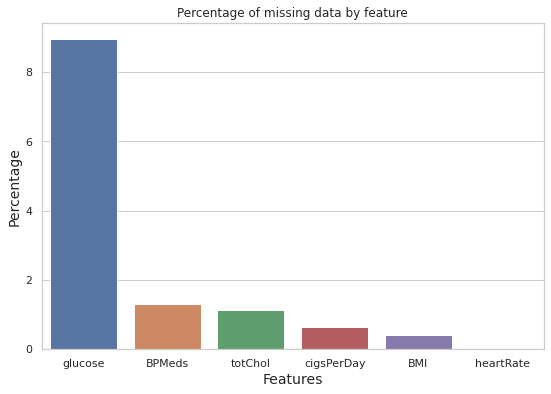

In [17]:
# Visualizing the percentage of missing data
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [18]:
# let's count the all rows which are having missing values 
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
# checking missing value percentage 
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  386
since it is only 11 percent of the entire dataset the rows with missing values are excluded.


At **8.97%**, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

Since the missing entries account for only **11%** of the total data so, we can drop these entries without losing alot of data.

In [19]:
# Excluding the missing values
df.dropna(axis=0,inplace=True)

In [20]:
# Now checking for missing values
df.isnull().any()

age                False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [21]:
# Checking for any duplicate values 
len(df[df.duplicated()])

0

In [22]:
# statistical measures about the data
df.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,49.521305,0.448402,0.492676,9.078562,0.030293,0.005992,0.314913,0.027297,237.222370,132.591711,82.923103,25.824041,75.816911,81.993009,0.152130
std,8.595076,0.497413,0.500030,11.890855,0.171421,0.077189,0.464559,0.162974,45.267516,22.270882,12.038348,4.121130,11.937110,24.125814,0.359207
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.057500,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,144.000000,90.000000,28.072500,83.000000,87.000000,0.000000
max,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


The features described in the above data set are:

1. **Count:** tells us the number of NoN-empty rows in a feature.

2. **Mean:** tells us the mean value of that feature.

3. **Std:** tells us the Standard Deviation Value of that feature.

4. **Min:** tells us the minimum value of that feature.

5. **25%, 50%, and 75%:** are the percentile/quartile of each features.

6. **Max:** tells us the maximum value of that feature.

**Data Distribution**

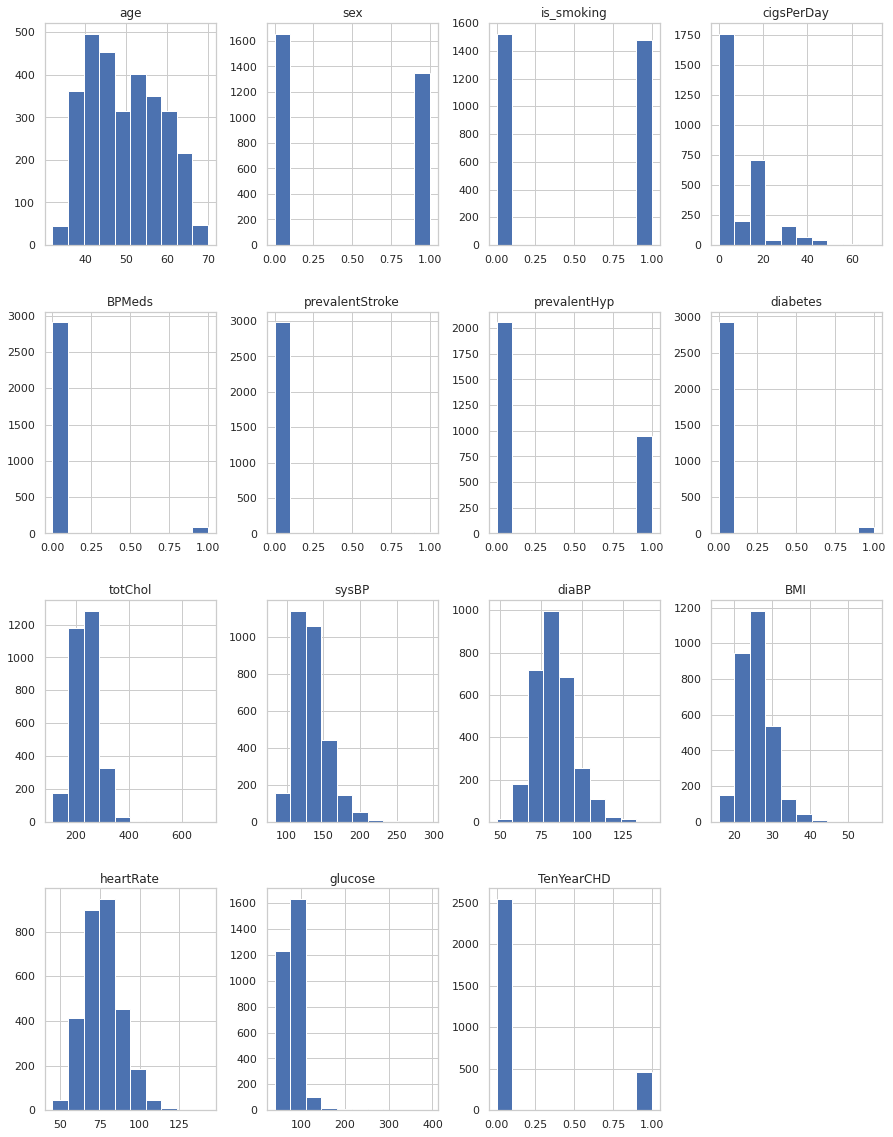

In [23]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

From above distribution plot we can say that the data on the **prevalent stroke**, **diabetes**, and **blood pressure** meds are poorly balanced.

# **Analysing features**

Target Variable Analysis:

In [24]:
# checking the distribution of Target Variable
df.TenYearCHD.value_counts()

0    2547
1     457
Name: TenYearCHD, dtype: int64

There are 2547 patients without heart disease and 572 patients with the disease.

1 --> Person have risk of coronary heart disease

0 --> Person do not have risk of coronary heart disease

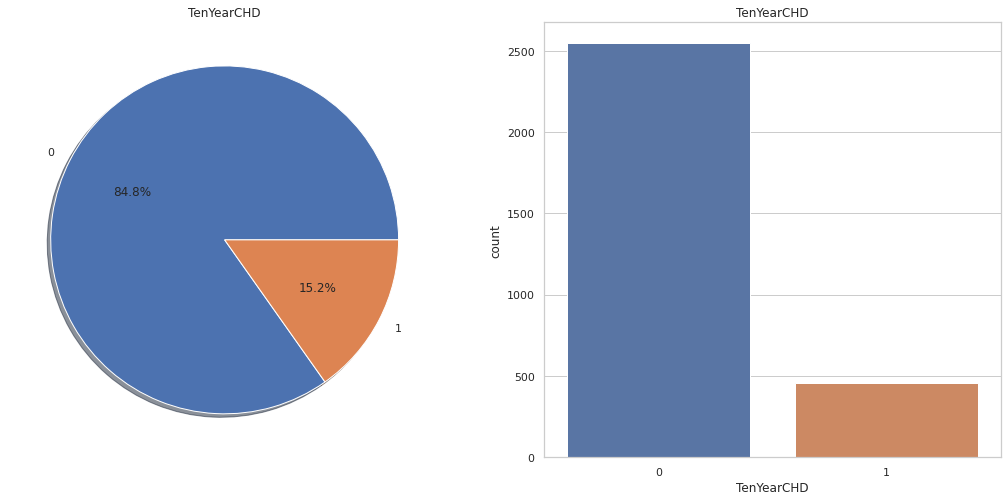

In [25]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(18,8))
df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')
sns.countplot('TenYearCHD',data=df,ax=ax[1])
ax[1].set_title('TenYearCHD')
plt.show()

We can see above that we have the imbalanced data set as the number of people without the disease greatly exceeds the number of people with the disease.

Let's look at the number of people with cardiovascular disease exceed the  number of people withhout cardiovascular disease.

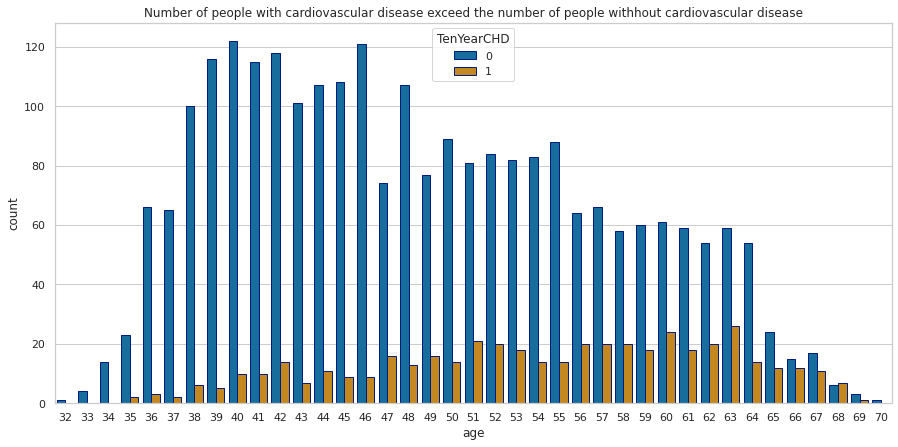

In [26]:
# Visualising the target and age variable
plt.figure(figsize=[15,7])
plt.title("Number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease")
sns.countplot(x='age', hue='TenYearCHD', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

As we can see in above plot The people with the highest risk of developing heart disease are betwwen the ages of **51 and 63.**

Because the number of sick people generally increases with age.

**Categorical variable comparisons:**

Plotting for other categorical variables with respect to target variable

In [27]:
from operator import add
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
  # Function to plot stacked bar chart
    default_colors = ['#006400', '#FF0000', '#228B22']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

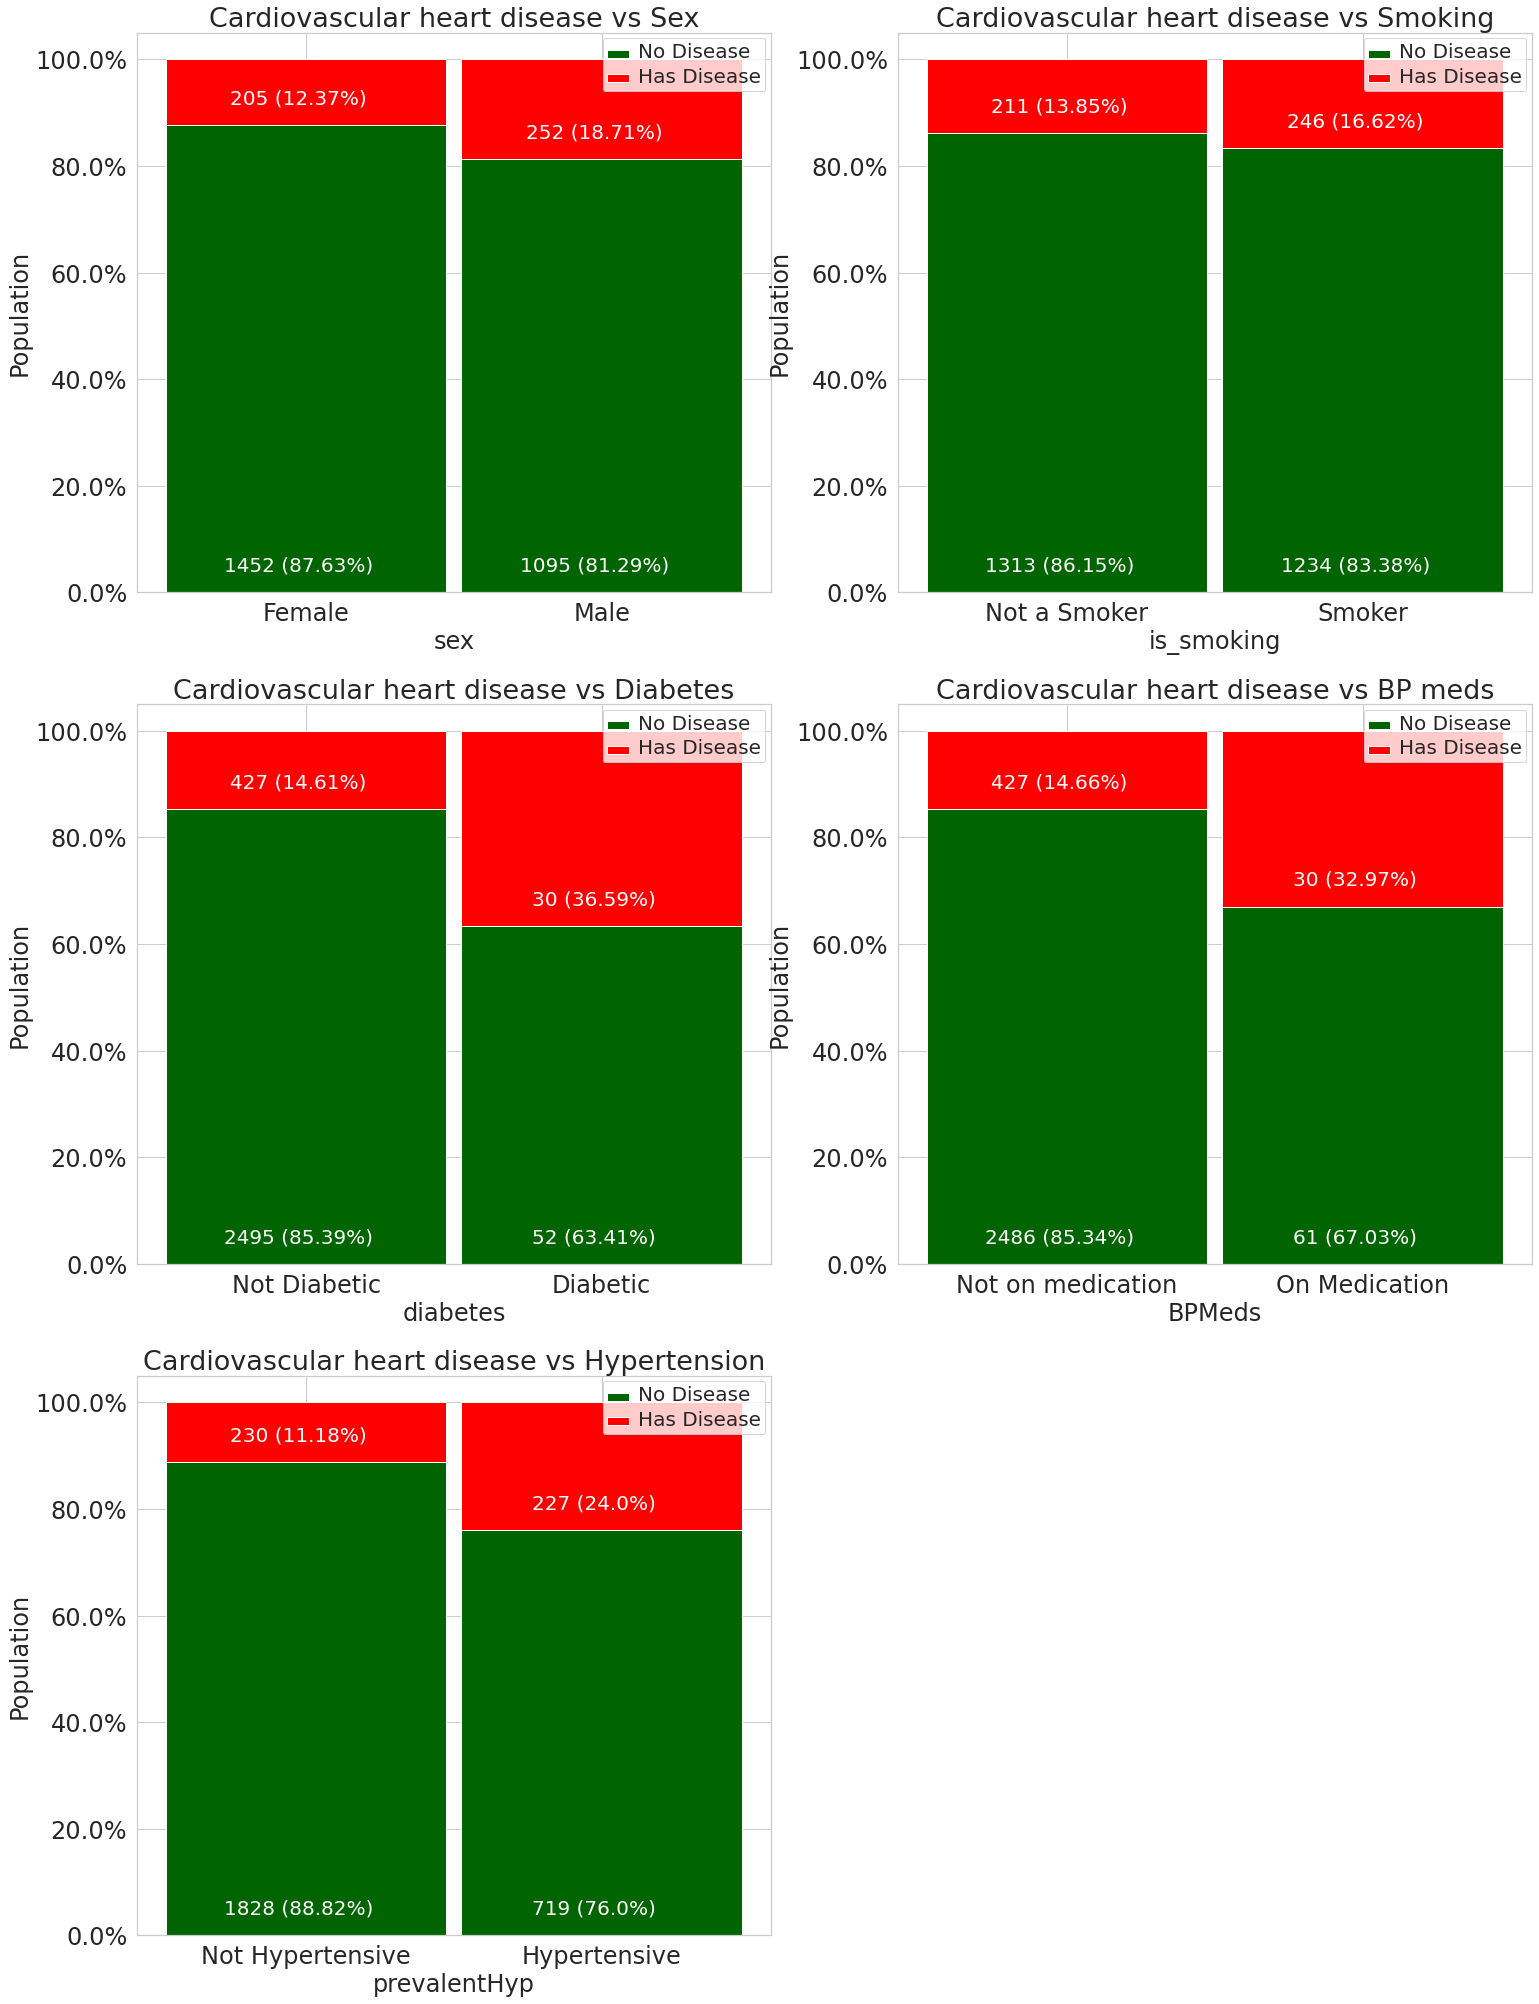

In [28]:
# Visualzing each category with respect to target variable
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#Plot sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','TenYearCHD']].groupby(['sex','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Sex', ylabel = 'Population')

#Plot smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['is_smoking','TenYearCHD']].groupby(['is_smoking','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Smoking', ylabel = 'Population')

#Plot diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Diabetes', ylabel = 'Population')

#Plot BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs BP meds', ylabel = 'Population')

#Plot Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Hypertension', ylabel = 'Population')

From the above categorical variables comparison plot we can conclude that,

*   Slightly more males are suffering from Cardiovascular heart disease than females.
*   The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
*   The percentage of people who have Cardiovascular heart disease is higher among the diabetic patients and also those patients with prevalent hypertension have more risk of Cardiovascular heart disease compare to those who don't have hypertensive problem.
*   The percentage of people who are on medication of blood pressure have more risk of Cardiovascular heart disease compare to those who are not on medication.




**Let's see the Correlation between the variables**

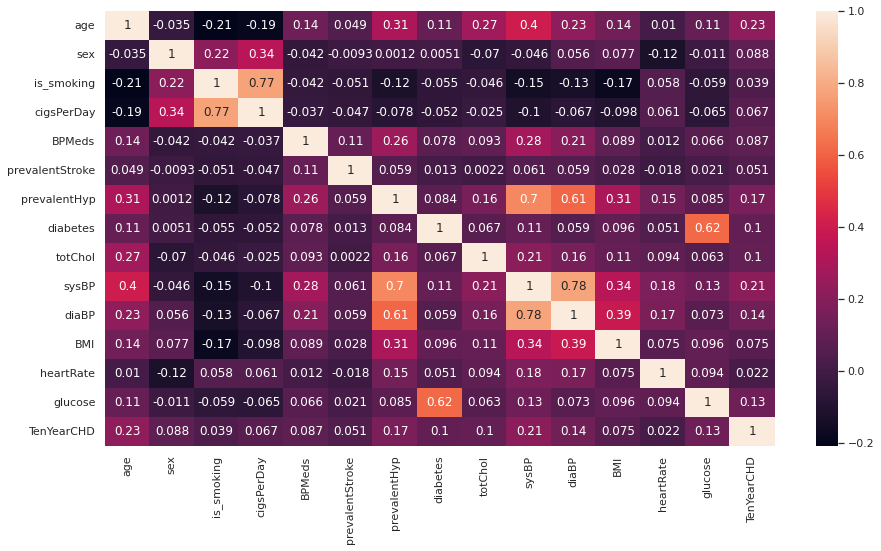

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

**From the above correlation plot we can conclude that**,



*   There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

*   Also there are a couple of features that are highly correlated with each other and it makes no sense to use both of them in building a machine learning model. 

**These includes:** 

*  Blood glucose and diabetes;
*  systolic and diastolic blood pressures;
*  cigarette smoking and the number of cigarretes smoked per day. 

Therefore we need to carry out feature selection to pick the best features. 
